<a href="https://colab.research.google.com/github/duongnhathuy/A_I/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist 
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

So nay la:8


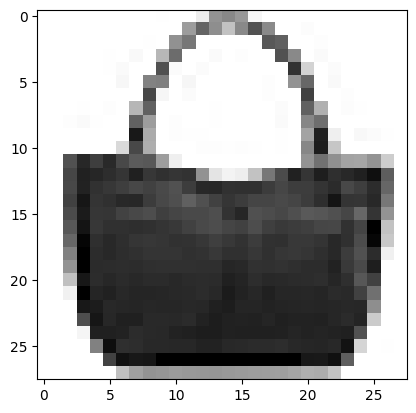

In [ ]:
import matplotlib.pyplot as plt
hinh = x_train[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('So nay la:{}' .format(y_train[100]))

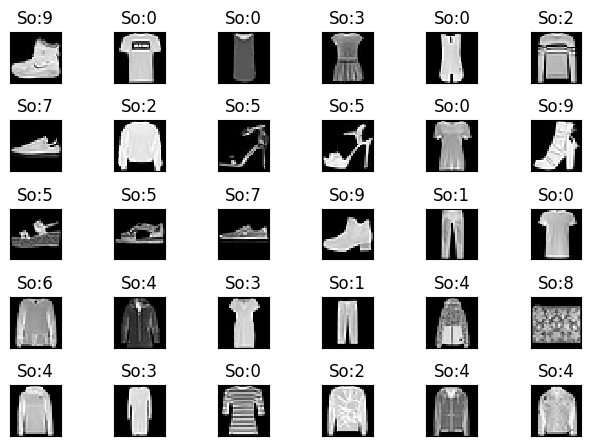

In [ ]:
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title('So:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical 

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28*1,), name='Lop1'))
model.add(Dense(10, activation='softmax', name='Lopra'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lop1 (Dense)                (None, 512)               401920    
                                                                 
 Lopra (Dense)               (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape((60000, 28*28*1))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000, 28*28*1))
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
model.compile(optimizer ='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 50, batch_size = 180)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accurency', test_acc)
print('Loss', test_loss)

Epoch 1/50
334/334 [==============================] - 3s 3ms/step - loss: 0.5941 - accuracy: 0.7893
Epoch 2/50
334/334 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8538
Epoch 3/50
334/334 [==============================] - 1s 4ms/step - loss: 0.3534 - accuracy: 0.8702
Epoch 4/50
334/334 [==============================] - 2s 5ms/step - loss: 0.3251 - accuracy: 0.8799
Epoch 5/50
334/334 [==============================] - 2s 6ms/step - loss: 0.3019 - accuracy: 0.8886
Epoch 6/50
334/334 [==============================] - 2s 6ms/step - loss: 0.2868 - accuracy: 0.8932
Epoch 7/50
334/334 [==============================] - 2s 5ms/step - loss: 0.2699 - accuracy: 0.9008
Epoch 8/50
334/334 [==============================] - 2s 5ms/step - loss: 0.2618 - accuracy: 0.9031
Epoch 9/50
334/334 [==============================] - 2s 5ms/step - loss: 0.2499 - accuracy: 0.9060
Epoch 10/50
334/334 [==============================] - 2s 5ms/step - loss: 0.2378 - accuracy: 0.9116

In [ ]:
model.save('cifar10.h5')

In [ ]:
classes_keys = {0: 'T-Shirt/Top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 
                4: 'Coat', 5: 'Sandals', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boots'}

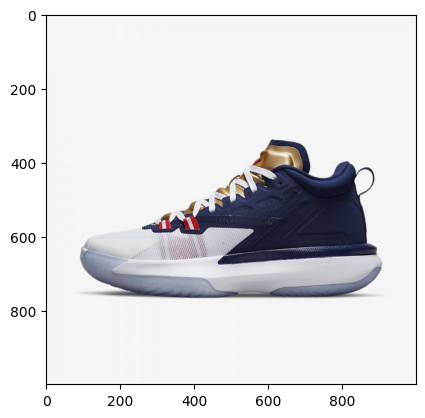

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np

from PIL import Image

url = 'nike.jpg'
img = load_img(url)
plt.imshow(img)

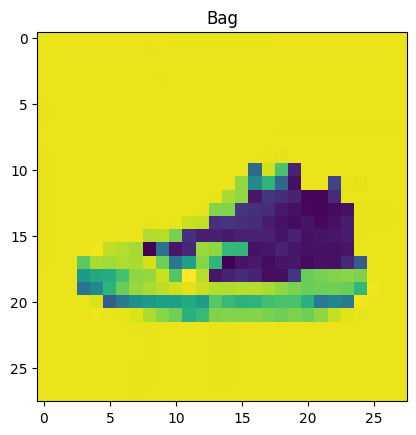

In [ ]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size=(28,28))

plt.imshow(img)

# From image to array to predict
img = img_to_array(img)
img = img[:,:,0]
plt.imshow(img)
img = img.astype('float32')
img = img/255
pred_value = np.argmax(model.predict(img.reshape( 1,28*28), verbose=False),)

# Check the class
for keys in classes_keys.keys():
  if pred_value == keys:
    plt.title(classes_keys[keys])
    break
  else:
    continue